### Load Iris dataset into Pandas DataFrame

In [29]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = pd.Categorical.from_codes(iris.target, iris.target_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  


#### or, as per The Book

In [16]:
X = iris.data[:, [2,3]] # only 2 features (petal length and width)
y = iris.target # class labels 0, 1, 2 


### Create Training and Test DataSets

In [34]:

from sklearn.model_selection import train_test_split
# Split the DataFrame into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=1)
print(f"Number of test examples: {len(test_df)}")
print('Labels counts in y:', np.bincount(train_df['target']))

Number of test examples: 30
Labels counts in y: [39 37 44]


In [ ]:


# test-size: percentage of test data from overall
# random-state: to reproduce results, as samples are selected randomly
# stratify=y: Create equal buckets based on y classes
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

# count examples per class in training dataset
unique_values, counts = np.unique(y_train, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

# or use bincount if you don't need (but doesn't return classes themselves)
print('Labels counts in y:', np.bincount(y_train))

0: 35
1: 35
2: 35
Labels counts in y: [35 35 35]


### Book: Feature Scaling

Mean X_train: 2.4933333333333327
Mean X_train_std: 1.0150610510858574e-16
STD X_train: 1.891674323458387
STD X_train_std: 0.9999999999999999
Min X_train: 0.1
Min X_train_std: -1.5557872688145624
Max X_train: 6.9
Max X_train_std: 1.734790447233992


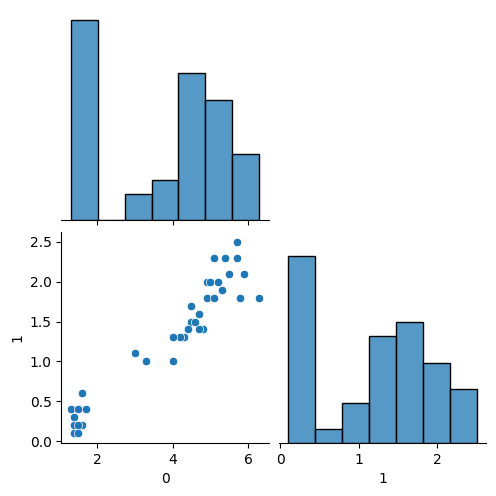

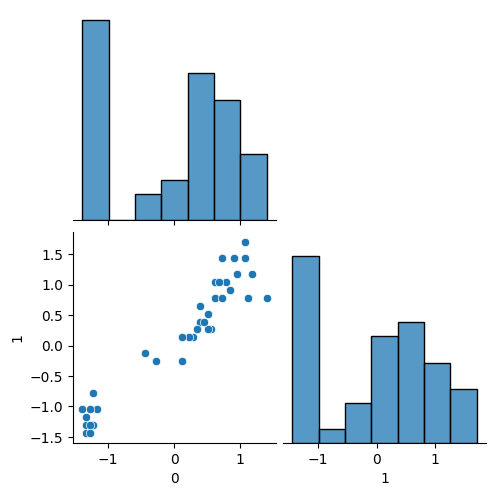

In [51]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns


sc = StandardScaler()
sc.fit(X_train)

# Verschiebt den Mittelwert nach 0, und die Standardabweichung auf 1
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print(f"Mean X_train: {X_train.mean()}")
print(f"Mean X_train_std: {X_train_std.mean()}")
print(f"STD X_train: {X_train.std()}")
print(f"STD X_train_std: {X_train_std.std()}")
print(f"Min X_train: {X_train.min()}")
print(f"Min X_train_std: {X_train_std.min()}")
print(f"Max X_train: {X_train.max()}")
print(f"Max X_train_std: {X_train_std.max()}")

sns.pairplot(pd.DataFrame(X_test), corner=True)
sns.pairplot(pd.DataFrame(X_test_std), corner=True)


### Implement Perceptron

In [52]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print(f'Misclassified examples: {(y_test != y_pred).sum()}')

Misclassified examples: 1


### Accuracy scores

In [63]:
from sklearn.metrics import accuracy_score

print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}%')

# Also

print(f'Accuracy: {ppn.score(X_test_std, y_test):.3f}%')

Accuracy: 0.978%
Accuracy: 0.978%


### Printing Decision Regions

Function for plotting

In [82]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# classifier: e.g. Perceptron, knn etc.
# funktioniert halt nur mit 2 features, aber mit bis zu 5 Klassen
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # set up markers and colors
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface (+- 1 to give a bit more space?!)
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # Die Vektoren, die die Region darstellen: xx1 hat alle x Werte, xx2 alle y Werte, als 2D Arrays 
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # Für jeden Vektor (muss jetzt 1D sein, und zwar als feature row mit mehreren Spalten) hole den Vorschlag
    # zeichne die Fläche mit Kontour?
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot Examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black'
                    )
    # Highlight Test Examples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], 
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='Test set'
                    )




Example

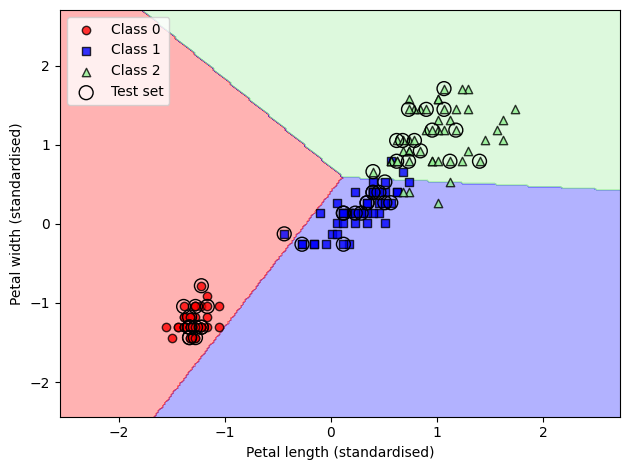

In [88]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn
                      , test_idx=range(105,150)
                      )
plt.xlabel('Petal length (standardised)')
plt.ylabel('Petal width (standardised)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


### Implement LogisticRegression

/Users/jus/Documents/Code/MachineLearningWithPyTorch/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


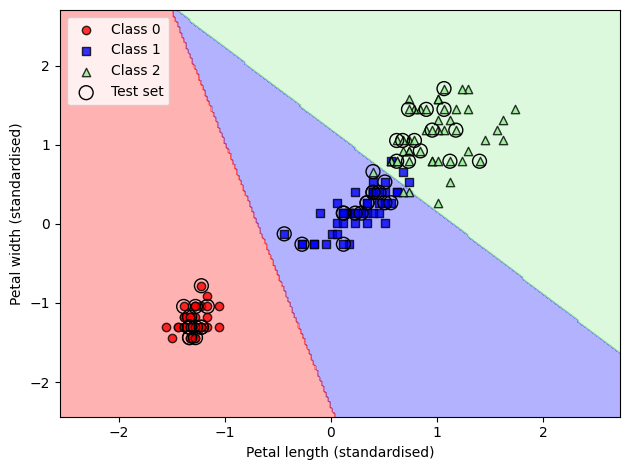

Accuracy: 0.978%


In [89]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0,
                        solver='lbfgs',
                        multi_class='ovr'
                        )
lr.fit(X_train_std, y_train)
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=lr
                      , test_idx=range(105,150)
                      )
plt.xlabel('Petal length (standardised)')
plt.ylabel('Petal width (standardised)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
print(f'Accuracy: {lr.score(X_test_std, y_test):.3f}%')

### Implement a KNN model 

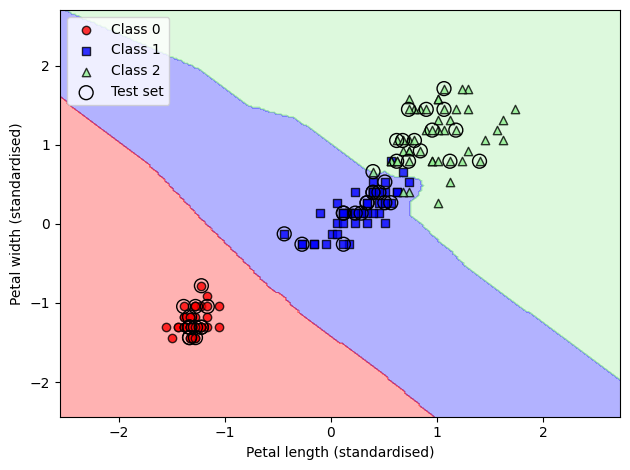

Accuracy: 1.000%


In [90]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski'
                           )
knn.fit(X_train_std, y_train)
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=knn
                      , test_idx=range(105,150)
                      )
plt.xlabel('Petal length (standardised)')
plt.ylabel('Petal width (standardised)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
print(f'Accuracy: {knn.score(X_test_std, y_test):.3f}%')
